# CM 2 - Méthodes statiques et méthodes d'instances

Reprennons ici les classes _PronomPersonnel_ et _Verbe_.

In [ ]:
class PronomPersonnel :
    def __init__(self, forme, nombre, personne, genre=""):
        self.forme = forme
        self.nombre = nombre
        self.personne = personne
        self.genre = genre

In [ ]:
class Verbe:
            
    def __init__(self, infinitif, base = "", groupe = 0):
        self.infinitif = infinitif
        if (base != "") : self.base = base
        else : self.base = infinitif[0:-2]
        if (groupe != 0) : self.groupe = groupe
        else :
            self.goupe = 3
            if (infinitif.endswith("er")) : self.groupe = 1
            elif (infinitif.endswith("ir")) : self.groupe = 2
    
    def afficher(self) :
        """Methode pour l'affichage"""
        print("Verbe " + self.infinitif + " : " + self.base + " " + str(self.groupe))
        
    def conjuguer(self, pron) :
        """Conjugaison avec un PronomPersonnel"""
        if (self.groupe == 1) :
            if (pron.nombre == "sg") :
                if (pron.personne == 1) or (pron.personne == 3) :
                    return pron.forme + " " + self.base + "e"
                elif (pron.personne == 2) :
                    return pron.forme + " " + self.base + "es"
            elif (pron.nombre == "pl") :
                if (pron.personne == 1) :
                    return pron.forme + " " + self.base + "ons"
                elif (pron.personne == 2) :
                    return pron.forme + " " + self.base + "ez"
                elif (pron.personne == 3) :
                    return pron.forme + " " + self.base + "ent"
                
        return "[forme inconnue]"

## Méthodes d'instances

**Méthodes d'instances** : les méthodes _afficher()_ et _conjuguer()_ sont des méthodes d'instances :
- le premier argument dans leur définition est **self**
- pour appeler ces méthodes, il faut d'abord créer un objet du type _Verbe_ (une instance de la classe), puis appliquer la méthode sur l'objet

In [ ]:
tirer = Verbe("tirer")
tirer.afficher()

Comment faire pour que la méthode _conjuguer()_ puisse produire les conjugaisons pour les différents groupes de verbes et temps ?

Nous allons stocker plusieurs listes de terminaisons pour pouvoir les appeler facilement dans la méthode _conjuguer()_.

In [ ]:
class Verbe:
            
    def __init__(self, infinitif, base = "", groupe = 0):
        self.infinitif = infinitif
        if (base != "") : self.base = base
        else : self.base = infinitif[0:-2]
        if (groupe != 0) : self.groupe = groupe
        else :
            self.groupe = 3
            if (infinitif.endswith("er")) : self.groupe = 1
            elif (infinitif.endswith("ir")) : self.groupe = 2
    
    def afficher(self) :
        """Methode pour l'affichage"""
        print("Verbe " + self.infinitif + " : " + self.base + " " + str(self.groupe))
        
    # listes de terminaisons
    term_present = { 1: ["e", "es", "e", "ons", "ez", "ent"], 
                     2: ["i", "is", "it", "issons", "issez", "issent"]}
    term_imparfait = { 1 : ["ais", "ais", "ait", "ions", "iez", "aient"],
                       2 : ["issais", "issais", "issait", "issions", "issiez", "issaient"]}
    
    def conjuguer(self, pron, temps='present') :
        """Conjugaison avec un PronomPersonnel"""
        """temps peut etre 'present' ou 'imparfait'"""
        
        # liste de terminaisons qui seront utilisees:
        liste_term = []
        if (temps == 'present'):
            liste_term = self.term_present[self.groupe]
        if (temps == 'imparfait'):
            liste_term = self.term_imparfait[self.groupe]
        
        # si on n'a pas trouve les terminaisons, sortir de la methode:
        if (not liste_term):
            return "[forme inconnue]"
        
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.personne - 1
        if (pron.nombre == "pl") :
            indice = pron.personne + 2
            
        return pron.forme + " " + self.base + liste_term[indice]
    
    @staticmethod
    def terminaisons(groupe = 1, temps = "present"):
        if (temps=="present") :
            return Verbe.term_present[groupe]
        if (temps=="imparfait") :
            return Verbe.term_imparfait[groupe]
        

In [ ]:
tirer = Verbe("tirer")
finir = Verbe("finir")
il = PronomPersonnel("il", "sg", 3, "m")
vous = PronomPersonnel("vous", "pl", 2)

In [ ]:
tirer.conjuguer(il)

In [ ]:
finir.conjuguer(il)

In [ ]:
tirer.conjuguer(vous, 'imparfait')

In [ ]:
finir.conjuguer(il, 'imparfait')

## Attributs et méthodes statiques

Les attributs term_present et term_imparfait sont des **attributs statiques (définis hors d’une méthode)**. Ils peuvent être appelés à partir de n'importe quel objet, mais également sans créer un objet :

In [ ]:
print(Verbe.term_present)

In [ ]:
print(tirer.term_imparfait)

**Méthodes statiques** : la méthode _terminaisons()_ est une méthode statique :
- dans sa définition on n'utilise pas l'argument **self**
- pour appeler cette méthode, il n'y a pas besoin de créer un objet du type _Verbe_. La méthode doit être appelée directement avec le nom de la classe.
- le **décorateur @staticmethod** se met immédiatement avant la définition de la méthode. Il rend possible d'appeler la méthode à partir d'une instance aussi bien qu'à partir de la classe elle-même.

In [ ]:
liste_t  = Verbe.terminaisons()
print(liste_t)

In [ ]:
liste_2 = tirer.terminaisons()
# L'appel est possible à partir d'un objet si le decorateur @staticmethod est utilisé
print(liste_2)

Les méthodes statiques sont utilisées pour implémenter des fonctionalités "générales", qui concernent tous les objets et ne dépendent pas de données d'un objet en particulier.

## La méthode __ str() __

Dans beaucoup de situation nous avons besoin de représenter un objet avec une chaîne de caractères, par ex. pour l'afficher.

In [ ]:
tirer = Verbe("tirer")
print(tirer)

La fonction _print()_ tente ici de convertir l'objet en une chaîne de caractères (elle appèle _str()_).

In [ ]:
print(str(tirer))

Dans la classe Verbe nous avions définit une méthode _afficher()_ pour pouvoir afficher les champs des verbes facilement. Cependant, ce serait beaucoup plus naturel si print(tirer) pourrait produire ce type d'affichage.

Pour cela, nous avons la possibilité de définir la méthode __ str() __ à l'intérieur de la classe. Cette méthode retournera une chaîne de caractères et sera automatiquement appelée quand on utilise _print()_ ou _str()_ avec un objet de la classe.

In [ ]:
class Verbe:
            
    def __init__(self, infinitif, base = "", groupe = 0):
        self.infinitif = infinitif
        if (base != "") : self.base = base
        else : self.base = infinitif[0:-2]
        if (groupe != 0) : self.groupe = groupe
        else :
            self.groupe = 3
            if (infinitif.endswith("er")) : self.groupe = 1
            elif (infinitif.endswith("ir")) : self.groupe = 2
    
    def __str__(self) :
        """Methode pour l'affichage"""
        return self.infinitif + " : " + self.base + " " + str(self.groupe)
        
    # listes de terminaisons
    term_present = { 1: ["e", "es", "e", "ons", "ez", "ent"], 
                     2: ["is", "is", "it", "issons", "issez", "issent"]}
    term_imparfait = { 1 : ["ais", "ais", "ait", "ions", "iez", "aient"],
                       2 : ["issais", "issais", "issait", "issions", "issiez", "issaient"]}
    
    def conjuguer(self, pron, temps='present') :
        """Conjugaison avec un PronomPersonnel"""
        """temps peut etre 'present' ou 'imparfait'"""
        
        # liste de terminaisons qui seront utilisees:
        liste_term = []
        if (temps == 'present'):
            liste_term = self.term_present[self.groupe]
        if (temps == 'imparfait'):
            liste_term = self.term_imparfait[self.groupe]
        
        # si on n'a pas trouve les terminaisons, sortir de la methode:
        if (not liste_term):
            return "[forme inconnue]"
        
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.personne - 1
        if (pron.nombre == "pl") :
            indice = pron.personne + 2
            
        return pron.forme + " " + self.base + liste_term[indice]
    
    @staticmethod
    def terminaisons(groupe = 1, temps = "present"):
        if (temps=="present") :
            return Verbe.term_present[groupe]
        if (temps=="imparfait") :
            return Verbe.term_imparfait[groupe]

In [ ]:
tirer = Verbe("tirer")
print(tirer)

In [ ]:
print("Verbe '" + str(tirer) + "'")

### Exercices

1. Ecrivez une méthode __ str() __ pour la classe PronomPersonnel et testez son fonctionnement.

2. Les pronoms personnels en français sont : _je, tu, il, elle, nous, vous, ils, elles_. Ré-ecrivez le constructeur de PronomPersonnel, en prenant comme arguments uniquement le nombre, la personne et éventuellement le genre. La forme du pronom devra être générée automatiquement à partir de ces données.

3. Toujours dans PronomPersonnel, ajoutez une méthode statique _pronoms()_ qui affiche la liste des pronoms personnels en français.

In [1]:
class PronomPersonnel :
    # liste de pronoms
    liste_pronoms = ["je", "tu", ["il", "elle"], "nous", "vous", ["ils", "elles"] ]
               
    # constructeur
    def __init__(self, nombre, personne, genre="m"):
        # verification de la validite des donnees :
        if nombre not in ["sg", "pl"] or personne not in [1,2,3] or genre not in ["m", "f"]:
            print("Erreur ! Appel à PronomPersonnel avec arguments invalides.")
            return
        
        self.nombre = nombre
        self.personne = personne
        self.genre = genre
        
        if nombre == "sg" :
            self.forme = PronomPersonnel.liste_pronoms[personne-1]
        else :
            self.forme = PronomPersonnel.liste_pronoms[personne+2]
        
        if personne == 3 :
            if genre == "m":
                self.forme = self.forme[0]
            else :
                self.forme = self.forme[1]
                
    # conversion en str
    def __str__(self):
        return self.forme + " (" + self.nombre + "," + str(self.personne) + self.genre + ")"

    # affichage de la liste des pronoms
    @staticmethod
    def pronoms():
        print(PronomPersonnel.liste_pronoms)

In [2]:
pr1 = PronomPersonnel("sg", 2)
pr2 = PronomPersonnel("pl", 3, "f")
pr3 = PronomPersonnel("sg", 3, "m")

print(pr1)
print(pr2)
print(pr3)

tu (sg,2m)
elles (pl,3f)
il (sg,3m)


In [3]:
PronomPersonnel.pronoms()
pr1.pronoms()

['je', 'tu', ['il', 'elle'], 'nous', 'vous', ['ils', 'elles']]
['je', 'tu', ['il', 'elle'], 'nous', 'vous', ['ils', 'elles']]


4. Dans la classe Verbe, ajoutez la possibilité de conjuguer au futur et au conditionnel du présent, pour les verbes de 1e et 2e groupe.

In [ ]:
class Verbe:

    # listes de terminaisons
    term_present = { 1: ["e", "es", "e", "ons", "ez", "ent"], 
                     2: ["is", "is", "it", "issons", "issez", "issent"]}
    term_imparfait = { 1 : ["ais", "ais", "ait", "ions", "iez", "aient"],
                       2 : ["issais", "issais", "issait", "issions", "issiez", "issaient"]}
    term_futur = { 1: ["erai", "eras", "era", "erons", "erez", "eront"], 
                   2: ["irai", "iras", "ira", "irons", "irez", "iront"]}
    term_cond_present = { 1: ["erais", "erais", "erait", "erions", "eriez", "eraient"], 
                          2: ["irais", "irais", "irait", "irions", "iriez", "iraient"]}
    

    def __init__(self, infinitif, base = "", groupe = 0):
        self.infinitif = infinitif
        if base != "" :
             self.base = base
        else : 
            self.base = infinitif[0:-2]
        if groupe != 0 :
             self.groupe = groupe
        else :
            self.groupe = 3
            if infinitif.endswith("er") :
                 self.groupe = 1
            elif infinitif.endswith("ir"): 
                self.groupe = 2
    
    def __str__(self) :
        """Methode pour l'affichage"""
        return self.infinitif + " : " + self.base + " " + str(self.groupe)
        
    def conjuguer(self, pron, temps='present') :
        """Conjugaison avec un PronomPersonnel"""
        
        # liste de terminaisons qui seront utilisees:
        # Modification ici : appel a la methode statique :
        liste_term = Verbe.terminaisons(self.groupe, temps)
        
        # si on n'a pas trouve les terminaisons, sortir de la methode:
        if (not liste_term):
            return "[forme inconnue]"
        
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.personne - 1
        if (pron.nombre == "pl") :
            indice = pron.personne + 2
            
        return pron.forme + " " + self.base + liste_term[indice]
    
    @staticmethod
    def terminaisons(groupe = 1, temps = "present"):
        if temps=="present" :
            return Verbe.term_present[groupe]
        if temps=="imparfait" :
            return Verbe.term_imparfait[groupe]
        if temps == 'futur' :
            return Verbe.term_futur[groupe]
        if temps == 'cond_present' :
            return Verbe.term_cond_present[groupe]

In [ ]:
# test de la classe :
vb1 = Verbe("chanter")
vb2 = Verbe("finir")

print(vb1)
print(vb2)

In [ ]:
# tests de conjugaisons :
for t in ["present", "imparfait", "futur", "cond_present"]:
    print(t + " : ")
    print(vb1.conjuguer(pr1,t))
    print(vb1.conjuguer(pr2,t))
    print(vb2.conjuguer(pr1,t))
    print(vb2.conjuguer(pr2,t))

5. Dans la classe Verbe :
    - ajoutez le champs "est_pronominal" qui aura comme valeur True ou False selon si le verbe est pronominal. Pour calculer cette valeur, il faudra vérifier si le verbe commence avec "se" et "s'" dans le constructeur.
    - ajoutez le champs "verbe_auxil" qui contiendra "être" ou "avoir" et qui représentera le verbe auxiliaire qui devra être utilisé pour les congujaisons au passé composé. Pour cela il faudrait lister les 12 verbes qui se conjuguent avec "être" dans un attribut statique _verbesEtre_.
    - ajoutez le champs "forme_pp" qui contiendra la forme du participe passé.
    - ajoutez la possibilité de conjuguer au passé composé, puis d'autres temps similaires, pour les verbes de 1e et 2e groupe.

In [1]:
class Verbe:
    
    verbesEtre = ["aller", "venir", "entrer", "sortir", "monter", "descendre", 
                  "tomber", "rester", "naître", "mourir", "arriver", "partir"]

     # listes de terminaisons
    term_present = { 1: ["e", "es", "e", "ons", "ez", "ent"], 
                     2: ["is", "is", "it", "issons", "issez", "issent"]}
    term_imparfait = { 1 : ["ais", "ais", "ait", "ions", "iez", "aient"],
                       2 : ["issais", "issais", "issait", "issions", "issiez", "issaient"]}
    term_futur = { 1: ["erai", "eras", "era", "erons", "erez", "eront"], 
                   2: ["irai", "iras", "ira", "irons", "irez", "iront"]}
    term_cond_present = { 1: ["erais", "erais", "erait", "erions", "eriez", "eraient"], 
                          2: ["irais", "irais", "irait", "irions", "iriez", "iraient"]}

        
    # avoir et être pour les temps composés :
    conj_auxil = {"avoir" : ["ai", "as", "a", "avons", "avez", "ont"],
                  "être"  : ["suis", "es", "est", "sommes", "êtes", "sont"]}
        

    def __init__(self, infinitif, base = "", groupe = 0):
        self.infinitif = infinitif
        if base != "" :
            self.base = base
        else :
            self.base = infinitif[0:-2]
        if groupe != 0 :
            self.groupe = groupe
        else :
            self.groupe = 3
            if infinitif.endswith("er") :
                self.groupe = 1
            elif infinitif.endswith("ir") :
                self.groupe = 2
                
        # Ajout est_pronominal :
        self.est_pronominal = False
        if infinitif.startswith("se ") or infinitif.startswith("s'"):
            self.est_pronominal = True
        
        # Ajout verbe_auxil :
        self.verbe_auxil = "avoir"
        if self.est_pronominal or self.infinitif in Verbe.verbesEtre:
            self.verbe_auxil = "être"
            
        # Ajout forme_pp :
        if self.groupe == 1:
            self.forme_pp = self.base + "é"
        if self.groupe == 2:
            self.forme_pp = self.base + "i"
        
    
    def __str__(self) :
        """Methode pour l'affichage"""
        return self.infinitif + " : " + self.base + " " + str(self.groupe)

    def conjuguer(self, pron, temps='present') :
        """Conjugaison avec un PronomPersonnel"""
        
        # trouver l'indice de la terminaison qui nous interesse :
        indice = pron.personne - 1
        if pron.nombre == "pl" :
            indice = pron.personne + 2
        
        if temps in ["present", "imparfait", "futur", "cond_present"] :
            # liste de terminaisons qui seront utilisees:
            liste_term = Verbe.terminaisons(self.groupe, temps)

            # si on n'a pas trouve les terminaisons, sortir de la methode:
            if not liste_term:
                return "[forme inconnue]"

            return pron.forme + " " + self.base + liste_term[indice]
    
        if temps == "passe_compose" :
            forme_conjuguee = pron.forme + " " + Verbe.conj_auxil[self.verbe_auxil][indice] + " " + self.forme_pp
            if pron.genre == "f" and self.verbe_auxil == "être" :
                forme_conjuguee += "e"
            if pron.nombre == "pl" and self.verbe_auxil == "être" :
                forme_conjuguee += "s"    
            return forme_conjuguee
                
        return "[forme inconnue]"
    
    @staticmethod
    def terminaisons(groupe = 1, temps = "present"):
        if temps=="present" :
            return Verbe.term_present[groupe]

        if temps=="imparfait" :
            return Verbe.term_imparfait[groupe]
            
        if temps == 'futur' :
            return Verbe.term_futur[groupe]

        if temps == 'cond_present' :
            return Verbe.term_cond_present[groupe]

In [2]:
# test de la classe :
verbes = [Verbe("monter"), Verbe("finir"), Verbe("s'envoler"), Verbe("se laver"), Verbe("venir")]

for v in verbes :
    print(v)

monter : mont 1
finir : fin 2
s'envoler : s'envol 1
se laver : se lav 1
venir : ven 2


In [6]:
# tests de conjugaisons :
pronoms = [PronomPersonnel("sg", 1), PronomPersonnel("pl",2), PronomPersonnel("pl",3,"f")]

for t in ["present", "imparfait", "futur", "cond_present", "passe_compose"]:
    print(t + " : ")
    for v in verbes :
        for p in pronoms :
            print(v.conjuguer(p,t))

present : 
je monte
vous montez
elles montent
je finis
vous finissez
elles finissent
je s'envole
vous s'envolez
elles s'envolent
je se lave
vous se lavez
elles se lavent
je venis
vous venissez
elles venissent
imparfait : 
je montais
vous montiez
elles montaient
je finissais
vous finissiez
elles finissaient
je s'envolais
vous s'envoliez
elles s'envolaient
je se lavais
vous se laviez
elles se lavaient
je venissais
vous venissiez
elles venissaient
futur : 
je monterai
vous monterez
elles monteront
je finirai
vous finirez
elles finiront
je s'envolerai
vous s'envolerez
elles s'envoleront
je se laverai
vous se laverez
elles se laveront
je venirai
vous venirez
elles veniront
cond_present : 
je monterais
vous monteriez
elles monteraient
je finirais
vous finiriez
elles finiraient
je s'envolerais
vous s'envoleriez
elles s'envoleraient
je se laverais
vous se laveriez
elles se laveraient
je venirais
vous veniriez
elles veniraient
passe_compose : 
je suis monté
vous êtes montés
elles sont montées
j

Il reste à gérer les problèmes des pronoms reflexifs (se), les verbes irréguliers de 3e groupe, les règles pour les accents et doublement de consonnes en 1e groupe etc.

Nouveau diagramme :

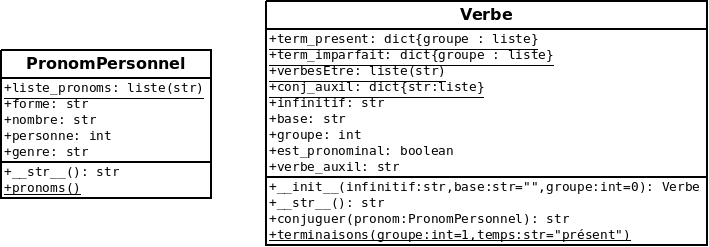